In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(
    filepath_or_buffer='column_2C_weka -Vertebral.csv',
    header=None,
    sep=',')
data.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
                'degree_spondylolisthesis', 'class']
data.dropna(how="all", inplace=True)
data.tail()
X = data.ix[:, 0:6].values
y = data.ix[:, 6].values

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


Eigenvectors 
[[  5.35141704e-01   7.17289820e-01  -4.23458331e-01   1.02798971e-01
    9.60691033e-02  -2.19368199e-03]
 [  3.23584608e-01  -4.16492034e-01  -1.50562387e-01   6.44118277e-03
    6.48700760e-01   5.27545439e-01]
 [  4.57969569e-01  -1.45673902e-11   6.76770127e-01   5.48099706e-01
   -1.52338410e-01   9.28751348e-02]
 [  4.45905809e-01  -5.58596187e-01  -4.31500108e-01   1.27200929e-01
   -3.60312716e-01  -3.96157338e-01]
 [ -1.43496674e-01  -3.44680270e-12  -2.75763131e-01   1.74212977e-01
   -5.85990593e-01   7.27755634e-01]
 [  4.23977530e-01   8.30376138e-12   2.78852214e-01  -8.01528139e-01
   -2.71184129e-01   1.62776864e-01]]

Eigenvalues 
[  3.25628543e+00   8.02102053e-17   3.27072713e-01   4.74057197e-01
   7.63553591e-01   1.19844855e+00]
Eigenvalues in descending order:
3.25628542651
1.19844854797
0.763553591225
0.47405719738
0.327072712643
8.02102052575e-17


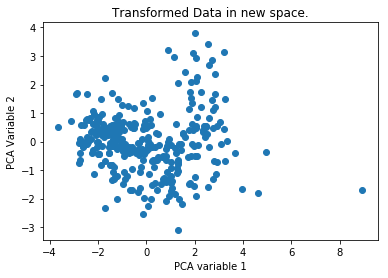

In [29]:
# Normalization
X_std = StandardScaler().fit_transform(X)
orig = X_std
cov_mat = np.cov(X_std.T)

# Computing Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

# Dimension Reduction for k=2
matrix_w = np.hstack((eig_pairs[0][1].reshape(6, 1),
                      eig_pairs[1][1].reshape(6, 1)))
Y = X_std.dot(matrix_w)

y1, y2 = Y.T
plt.scatter(y1, y2)
plt.title("Transformed Data in new space.")
plt.xlabel('PCA variable 1')
plt.ylabel('PCA Variable 2')
plt.show()

In [31]:
#Used Sklearn for Visualization of classes
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

traces = []
for name in ('Abnormal', 'Normal'):
    trace = Scatter(
        x=Y[y == name, 0],
        y=Y[y == name, 1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)

data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                            yaxis=YAxis(title='PC2'), ))

fig = Figure(data=data, layout=layout)
py.iplot(fig)

